In [ ]:
from typing import List, Optional
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [ ]:
def range_sum_BST(root: Optional[TreeNode], low: int, high: int) -> int:
        """traverse tree and accumulate values satisfying condition"""
        res = root.val if root.val <=high and root.val>=low else 0
        def dfs_visit(s,parent):
            for v in (s.left,s.right):
                if v and v not in parent:
                    parent[v]=s
                    nonlocal res
                    if v.val <= high and v.val>=low: res+=v.val
                    dfs_visit(v,parent)
        dfs_visit(root,{root:None})
        return res

## Helper functions for creating BST from a list

In [ ]:
def insert_into_bst(root, val):
    if root is None:  return TreeNode(val)
    if val<root.val:  
        root.left = insert_into_bst(root.left, val)
    else: 
        root.right = insert_into_bst(root.right, val)
    return root

def create_bst(entries:List[int])-> TreeNode:
    bst_root = None
    for entry in entries:
        if entry is not None:
            bst_root = insert_into_bst(bst_root, entry)
    return bst_root

## Test

In [ ]:
def test():
    entries = [10, 5, 15, 3, 7, 13, 18, 1, None, 6]
    root=create_bst(entries)
    assert range_sum_BST(root, 6,10) ==23
    entries =[10,5,15,3,7,None,18]
    root=create_bst(entries)
    assert range_sum_BST(root, 7,15) == 32

In [ ]:
test()

## Visualisation

In [ ]:
def add_edges(graph, node):
    if node is not None:
        if node.left is not None:
            graph.add_edge(node.val, node.left.val)
            add_edges(graph, node.left)
        if node.right is not None:
            graph.add_edge(node.val, node.right.val)
            add_edges(graph, node.right)

def plot_tree(root):
    graph = nx.DiGraph()
    add_edges(graph, root)
    pos = graphviz_layout(graph, prog='dot')
    nx.draw(graph, pos, with_labels=True, arrows=False)
    plt.show()

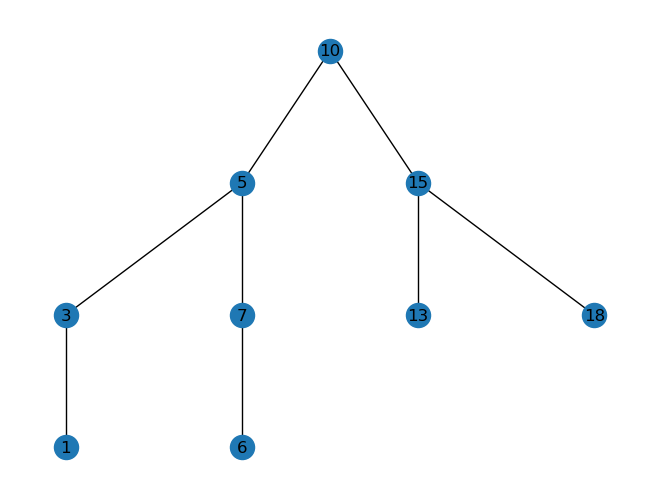

In [ ]:
entries = [10, 5, 15, 3, 7, 13, 18, 1, None, 6]
root=create_bst(entries)
plot_tree(root)

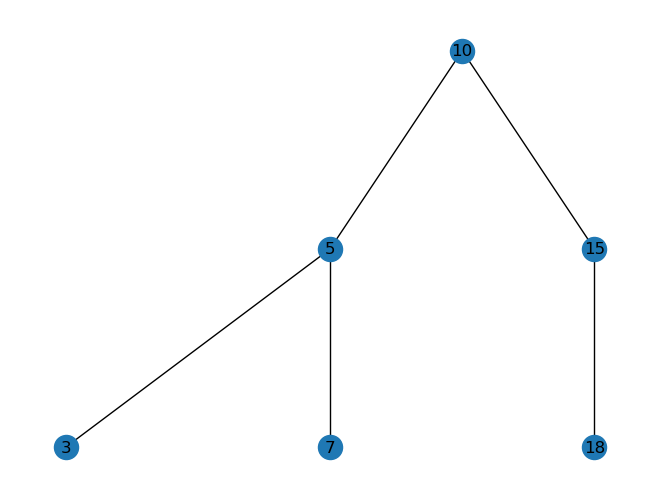

In [ ]:
entries =[10,5,15,3,7,None,18]
root=create_bst(entries)
plot_tree(root)